## TRABAJO FINAL METODOLOGÍA DE LA OPINIÓN PÚBLICA

### "Análisis de resultados en las elecciones generales 2023 para CABA"


#### Grupo: Matías Chiampan, Nicolas Faccini, Camila Valeff

El objetivo del siguiente trabajo consistió en examinar los resultados electorales en la instancia de elecciones generales dentro de CABA. 
Para ello se utilizó Python y diferentes librerias importadas con el fin de robustecer la capacidad de análisis, incorporando diversidad de gráficas. 

Las librerías se importaron a partir de las funciones "import" e "install", los scripts para este paso fueron los siguientes:

In [ ]:
pip install contextily

In [ ]:
pip install geopandas

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import plotly.express as px

Luego de importar las librerias requerida, importamos los archivos .csv que son nuestra fuente de información. Tenemos dos tipos de archivos: los referidos a los resultados de las elecciones en 2023 y las bases de datos del CENSO 2010 en Argentina. Estas últimas nos permitirán contar con variables sociodemográficos para las comunas de CABA, con el fin de explorar si existe algún patrón entre éstas y las elecciones de los votantes

### Bases de datos elecciones generales 2023

In [ ]:
df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')
df_caba = pd.read_csv('2023_Generales\CABA-circuitos-electorales.csv')
df_ambitos = pd.read_csv('2023_Generales/Ambitos_Generales_2023.csv')
df_colores = pd.read_csv('2023_Generales/Colores_2023.csv')

#### Las tablas importadas cuentan con la siguiente estructura

In [6]:
print("Tabla resultados")
print(f"Estructura: {df_resultados.shape}")
print("\n")
df_resultados.head().T

Tabla resultados
Estructura: (5868102, 23)




,0,1,2,3,4
año,2023,2023,2023,2023,2023
eleccion_tipo,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL
recuento_tipo,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO
padron_tipo,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
distrito_id,1,1,1,1,1
distrito_nombre,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires
seccionprovincial_id,0,0,0,0,0
seccionprovincial_nombre,NaN,NaN,NaN,NaN,NaN
seccion_id,1,1,1,1,1
seccion_nombre,Comuna 01,Comuna 01,Comuna 01,Comuna 01,Comuna 01


In [7]:
print("Circuitos electorales en CABA")
print(f"Estructura: {df_caba.shape}")
print("\n")
df_caba.head()

Circuitos electorales en CABA
Estructura: (167, 10)




,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,1,1,1,SAN TELMO,11377.0,5695.0,5682.0,4157.175563,7.097216e+05
1,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,2,2,1,SAN TELMO,11365.0,5870.0,5495.0,3045.858735,5.234309e+05
2,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,3,3,1,PUERTO MADERO,702.0,416.0,286.0,14439.585623,4.248033e+06
3,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,4,4,1,PUERTO MADERO,489.0,307.0,182.0,8028.115470,7.773725e+05
4,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,5,5,1,RETIRO,5275.0,3131.0,2144.0,16401.981477,3.262096e+06


In [8]:
print("Ambitos Generales")
print(f'Estructura: {df_ambitos.shape}')
print("\n")
df_ambitos.head(15)

Ambitos Generales
Estructura: (528, 7)




,año,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre
0,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01
1,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,2,Comuna 02
2,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,3,Comuna 03
3,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,4,Comuna 04
4,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05
5,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,6,Comuna 06
6,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,7,Comuna 07
7,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,8,Comuna 08
8,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,9,Comuna 09
9,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,10,Comuna 10


### Bases de datos CENSO 2010

Las bases de datos del censo utilizadas son 8, siendo la base de viviendas, la de hogares y la de personas las 3 más importantes para el análisis del perfil sociodemográfico de las comunas en CABA. Las otras tablas se utilizarán para datos geográficos de la población, los cuales nos permiten relacionar la información del censo con las elecciones generales.

In [9]:
Cen_viviendas = pd.read_csv('censo2010/censo/vivienda.csv')
Cen_hogares = pd.read_csv('censo2010/censo/hogar.csv')
Cen_personas = pd.read_csv('censo2010/censo/persona.csv')
Cen_dpto = pd.read_csv('censo2010/censo/dpto.csv')
Cen_frac = pd.read_csv('censo2010/censo/frac.csv')
Cen_prov = pd.read_csv('censo2010/censo/prov.csv')
Cen_radio= pd.read_csv('censo2010/censo/radio.csv')

Para trabajar con las bases del censo 2010 se requirió generar un diagrama de entidad relación (DER) que permitiera un mayor entendimiento de sus datos. Cabe aclarar que éstos son centralmente códigos cuyas etiquetas se encuentran en la carpeta "lebels".
El DER se desarrolló de la siguiente forma:

![DER Censo2010.png](<attachment:DER Censo2010.png>)

#### Las tablas del CENSO 2010

Las tablas del censo 2010 se imprimen de la siguiente forma:

In [10]:
print("Tabla de características de las viviendas")
print(f'Estructura: {Cen_viviendas.shape}')
Cen_viviendas.head()

Tabla de características de las viviendas
Estructura: (1085463, 13)


,VIVIENDA_REF_ID,RADIO_REF_ID,TIPVV,V01,V02,V00,URP,INCALSERV,INMAT,MUNI,LOCAL,INCALCONS,TOTHOG
0,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2
1,2,1,1,7,1,0,1,1,2,20010001,2001010,2,2
2,3,1,1,4,1,0,1,1,1,20010001,2001010,1,2
3,4,1,1,4,1,0,1,1,1,20010001,2001010,1,1
4,5,1,1,1,1,0,1,3,3,20010001,2001010,2,1


In [11]:
print("Tabla características de los hogares")
print(f'Estructura: {Cen_hogares.shape}')
Cen_hogares.head()

Tabla características de los hogares
Estructura: (1152599, 23)


,HOGAR_REF_ID,VIVIENDA_REF_ID,NHOG,H05,H06,H07,H08,H09,H10,H11,...,H15,H16,H19A,H19B,H19C,H19D,PROP,INDHAC,TOTPERS,ALGUNBI
0,1,1,1,1,4,1,1,1,1,1,...,2,2,1,2,1,2,5,1,1,0
1,2,1,2,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,0
2,3,1,4,1,3,1,1,1,1,1,...,3,5,1,1,1,1,1,1,2,0
3,4,1,6,1,1,1,1,1,1,1,...,3,5,1,1,1,1,5,6,8,1
4,5,2,1,1,1,2,1,1,1,1,...,5,5,1,1,2,1,6,1,2,1


In [12]:
print("Tabla de características de las personas")
print(f'Estructura: {Cen_personas.shape}')
Cen_personas.head()

Tabla de características de las personas
Estructura: (2890151, 15)


,PERSONA_REF_ID,HOGAR_REF_ID,P01,P02,P03,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
0,1,1,1,2,61,1,0,1,2,2,13,2,4,2,1
1,2,2,1,1,48,1,0,1,1,2,10,2,4,1,1
2,3,3,1,1,65,1,0,1,1,3,14,2,7,2,1
3,4,3,2,2,62,1,0,1,1,2,13,2,6,1,3
4,5,4,1,1,20,2,221,1,1,2,5,1,4,2,1


#### Merge Base de datos CENSO 2010

In [13]:
#merge para unificar personas-hogares

merge_persona_hogar = pd.merge(Cen_personas, Cen_hogares[['HOGAR_REF_ID', 'ALGUNBI', 'VIVIENDA_REF_ID']], on='HOGAR_REF_ID', how='left')

#merge para unificar el combinado anterior con viviendas

merge_total = pd.merge(merge_persona_hogar, Cen_viviendas[['VIVIENDA_REF_ID', 'MUNI', 'LOCAL']], on='VIVIENDA_REF_ID', how='left')

#total base censo por persona, filtrado por las comunas que pertenecen a CABA.
censo_caba = merge_total[(merge_total['MUNI'] >= 20010001) & (merge_total['MUNI'] <= 20150001)]

censo_caba

,PERSONA_REF_ID,HOGAR_REF_ID,P01,P02,P03,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT,ALGUNBI,VIVIENDA_REF_ID,MUNI,LOCAL
0,1,1,1,2,61,1,0,1,2,2,13,2,4,2,1,0,1,20010001,2001010
1,2,2,1,1,48,1,0,1,1,2,10,2,4,1,1,0,1,20010001,2001010
2,3,3,1,1,65,1,0,1,1,3,14,2,7,2,1,0,1,20010001,2001010
3,4,3,2,2,62,1,0,1,1,2,13,2,6,1,3,0,1,20010001,2001010
4,5,4,1,1,20,2,221,1,1,2,5,1,4,2,1,1,1,20010001,2001010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,2890147,1152599,0,2,95,1,0,1,0,3,20,2,2,1,0,2,1426438,20150001,2015010
2890147,2890148,1152599,0,2,91,1,0,1,0,3,19,2,6,1,0,2,1426438,20150001,2015010
2890148,2890149,1152599,0,2,83,1,0,1,0,3,17,2,2,1,0,2,1426438,20150001,2015010
2890149,2890150,1152599,0,2,89,1,0,1,0,3,18,2,2,1,0,2,1426438,20150001,2015010


In [14]:
#hacemos un replace para que los valores de id local coincidan con los ids de comuna en la base de elecciones (representan lo mismo)
nuevos_codigos = {2001010:1,
2002010:2,
2003010:3,
2004010:4,
2005010:5,
2006010:6,
2007010:7,
2008010:8,
2009010:9,
2010010:10,
2011010:11,
2012010:12,
2013010:13,
2014010:14,
2015010:15
}

censo_caba['LOCAL'] = censo_caba['LOCAL'].replace(nuevos_codigos)
censo_caba

,PERSONA_REF_ID,HOGAR_REF_ID,P01,P02,P03,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT,ALGUNBI,VIVIENDA_REF_ID,MUNI,LOCAL
0,1,1,1,2,61,1,0,1,2,2,13,2,4,2,1,0,1,20010001,1
1,2,2,1,1,48,1,0,1,1,2,10,2,4,1,1,0,1,20010001,1
2,3,3,1,1,65,1,0,1,1,3,14,2,7,2,1,0,1,20010001,1
3,4,3,2,2,62,1,0,1,1,2,13,2,6,1,3,0,1,20010001,1
4,5,4,1,1,20,2,221,1,1,2,5,1,4,2,1,1,1,20010001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,2890147,1152599,0,2,95,1,0,1,0,3,20,2,2,1,0,2,1426438,20150001,15
2890147,2890148,1152599,0,2,91,1,0,1,0,3,19,2,6,1,0,2,1426438,20150001,15
2890148,2890149,1152599,0,2,83,1,0,1,0,3,17,2,2,1,0,2,1426438,20150001,15
2890149,2890150,1152599,0,2,89,1,0,1,0,3,18,2,2,1,0,2,1426438,20150001,15


### Reestructuración de las tablas para caracterización de comunas

Con el fin de adaptar los resultados del censo a las necesidades de este trabajo, creamos nuevas tablas que nos permitirán luego conectar esta información con las bases de datos de los resultados electorales. Siguiente este propósito, nos hicimos las siguientes preguntas que orientarán más tarde el análisis:

    1. ¿Cuáles son las comunas con mayor cantidad de hogares/personas con alguna necesidad básica insatisfecha (NBI)?
    2. Según nivel educativo, ¿Cómo se distribuye el % de personas con un nivel educativo mayor a secundario completo? (cods 6,7,8 var P09 Población) ¿Y con al menos secundario completo?
    

Primero, se calculó cuantas personas tienen al menos alguna necesidad básica insatisfecha según los criterios del CENSO 2010


In [74]:
CANT_personas_nbiP = censo_caba[censo_caba['ALGUNBI'] == 1].groupby('LOCAL')['PERSONA_REF_ID'].count().sort_values(ascending=False).reset_index(name='conteo_ALGUNBI')
pd.DataFrame(CANT_personas_nbiP)

CANT_personas_nbiP['P_de_poblacion_total_con_algun_NBI'] = ((CANT_personas_nbiP['conteo_ALGUNBI'] / CANT_personas_nbiP['conteo_ALGUNBI'].sum()) * 100).round(1).astype(str) + '%'
poblacion_por_comuna = censo_caba.groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Poblacion_de_comuna')
CANT_personas_nbiP = pd.merge(CANT_personas_nbiP, poblacion_por_comuna, on='LOCAL')

CANT_personas_nbiP['P_segun_poblacion_de_comuna'] = ((CANT_personas_nbiP['conteo_ALGUNBI'] / CANT_personas_nbiP['Poblacion_de_comuna']) * 100).round(1)

Total_NBI_caba = CANT_personas_nbiP['conteo_ALGUNBI'].sum()

print(f'Total de personas con al menos una necesidad básica insatisfecha en CABA: {Total_NBI_caba}')
pd.DataFrame(CANT_personas_nbiP)

Total de personas con al menos una necesidad básica insatisfecha en CABA: 198114


,LOCAL,conteo_ALGUNBI,P_de_poblacion_total_con_algun_NBI,Poblacion_de_comuna,P_segun_poblacion_de_comuna
0,1,34311,17.3%,205886,16.7
1,4,32157,16.2%,218245,14.7
2,8,25844,13.0%,187237,13.8
3,3,22897,11.6%,187537,12.2
4,7,21350,10.8%,220591,9.7
5,5,11079,5.6%,179005,6.2
6,15,9185,4.6%,182574,5.0
7,9,8504,4.3%,161797,5.3
8,10,6248,3.2%,166022,3.8
9,14,5873,3.0%,225970,2.6


Luego creamos un mapa para visualizar cuales son las comunas que tienen mayor porcentaje de personas con al menos una necesidad básica insatisfecha en sus hogares.


C:\Users\camiv\AppData\Local\Temp\ipykernel_10912\3015715840.py:11: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf_dissolved = gdf.dissolve(by='COMUNA', aggfunc='mean')


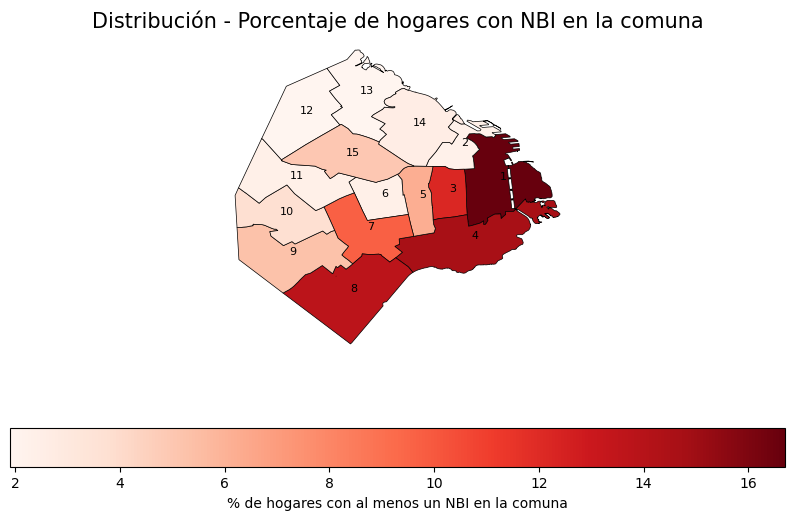

In [87]:
# Crear GeoDataFrame con geometría y datos de censo
gdf = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf['COMUNA'] = gdf['COMUNA'].astype(int)
CANT_personas_nbiP['LOCAL'] = CANT_personas_nbiP['LOCAL'].astype(int)
gdf = gdf.join(CANT_personas_nbiP.set_index('LOCAL'), on='COMUNA', how='left')

# Convertir la columna a valores numéricos, redondear y convertir a float
gdf['P_segun_poblacion_de_comuna'] = gdf['P_segun_poblacion_de_comuna'].round(1).astype(float)

# Dissolver por COMUNA y calcular el promedio de "% según población de comuna"
gdf_dissolved = gdf.dissolve(by='COMUNA', aggfunc='mean')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Cambiar colores y agregar etiquetas
gdf_dissolved.plot(column='P_segun_poblacion_de_comuna', ax=ax, legend=True,
                   legend_kwds={'label': "% de con al menos un NBI en la comuna",
                                'orientation': "horizontal"}, cmap='Reds', 
                   vmin=gdf['P_segun_poblacion_de_comuna'].min(), vmax=gdf['P_segun_poblacion_de_comuna'].max(),
                   edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las comunas
for x, y, label in zip(gdf_dissolved.geometry.centroid.x, gdf_dissolved.geometry.centroid.y, gdf_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')


# Añadir título y etiquetas
ax.set_title('Distribución - Porcentaje de personas con NBI en la comuna', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()


Realizamos un análisis de la población con un nivel educativo de al menos el secundario completo en 2010, por comuna. Para ello, tomamos los códigos 5,6,7,8 de la variable P09 de la tabla de población

In [91]:
CANT_personas_ES = censo_caba[censo_caba['P09'].isin([5,6,7,8])].groupby('LOCAL')['PERSONA_REF_ID'].count().sort_values(ascending=False).reset_index(name='conteo_personas_secundario')
pd.DataFrame(CANT_personas_ES)

CANT_personas_ES['Porcentaje que representa de la población total'] = ((CANT_personas_ES['conteo_personas_secundario'] / CANT_personas_ES['conteo_personas_secundario'].sum()) * 100).round(1).astype(str) + '%'

poblacion_por_comuna = censo_caba.groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Población de comuna')
poblacion_por_comuna_m18 = censo_caba[censo_caba['P03'] >= 18].groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Población de comuna_m18')

merged_df = pd.merge(CANT_personas_ES, poblacion_por_comuna, on='LOCAL')

# Segundo merge entre merged_df y poblacion_por_comuna_m18
CANT_personas_ES = pd.merge(merged_df, poblacion_por_comuna_m18, on='LOCAL')

CANT_personas_ES['P_segun_poblacion_de_comuna'] = ((CANT_personas_ES['conteo_personas_secundario'] / CANT_personas_ES['Población de comuna_m18']) * 100).round(1)


CANT_personas_ES.sort_values(by='P_segun_poblacion_de_comuna', ascending=False)

,LOCAL,conteo_personas_secundario,Porcentaje que representa de la población total,Población de comuna,Población de comuna_m18,P_segun_poblacion_de_comuna
2,2,96279,8.7%,157932,136894,70.3
0,14,129717,11.7%,225970,191596,67.7
1,13,124974,11.3%,231331,192437,64.9
3,6,84628,7.6%,176076,146155,57.9
6,5,74894,6.8%,179005,147885,50.6
4,12,81909,7.4%,200116,162454,50.4
8,15,70232,6.3%,182574,148077,47.4
5,1,79402,7.2%,205886,168197,47.2
7,11,70351,6.3%,189832,153268,45.9
9,3,68846,6.2%,187537,153918,44.7


Luego, realizamos el mismo gráfico que aplicamos en el análisis de los casos con al menos un NBI, pero para el porcentaje de personas con el secundario o más del secundario completo


C:\Users\camiv\AppData\Local\Temp\ipykernel_10912\3271123336.py:11: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf2_dissolved = gdf2.dissolve(by='COMUNA', aggfunc='mean')


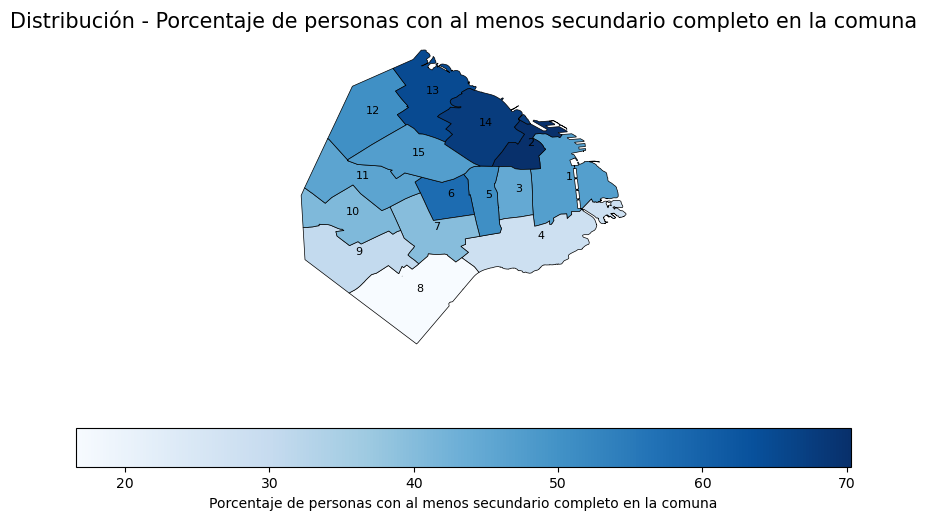

In [94]:
# Crear GeoDataFrame con geometría y datos de censo
gdf2 = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf2['COMUNA'] = gdf2['COMUNA'].astype(int)
CANT_personas_ES['LOCAL'] = CANT_personas_ES['LOCAL'].astype(int)
gdf2 = gdf2.join(CANT_personas_ES.set_index('LOCAL'), on='COMUNA', how='left')

# Convertir la columna a valores numéricos, redondear y convertir a float
gdf2['P_segun_poblacion_de_comuna'] = gdf2['P_segun_poblacion_de_comuna'].round(1).astype(float)

# Dissolver por COMUNA y calcular el promedio de "% según población de comuna"
gdf2_dissolved = gdf2.dissolve(by='COMUNA', aggfunc='mean')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Cambiar colores y agregar etiquetas
gdf2_dissolved.plot(column='P_segun_poblacion_de_comuna', ax=ax, legend=True,
                   legend_kwds={'label': "Porcentaje de personas con al menos secundario completo en la comuna",
                                'orientation': "horizontal"}, cmap='Blues', 
                   vmin=gdf2['P_segun_poblacion_de_comuna'].min(), vmax=gdf2['P_segun_poblacion_de_comuna'].max(),
                   edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las comunas
for x, y, label in zip(gdf2_dissolved.geometry.centroid.x, gdf2_dissolved.geometry.centroid.y, gdf2_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')


# Añadir título y etiquetas
ax.set_title('Distribución - Porcentaje de personas con al menos secundario completo en la comuna', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

## Análisis de los resultados en CABA

Para producir un análisis de los resultaods electorales en CABA iniciamos reduciendo la base de datos inicial para que coincida con el recorte geográfico requerido. 

In [17]:
print("Tabla de resultados elecciones generales 2023- CABA")
df_resultados_caba = df_resultados[df_resultados['distrito_id'] == 1]
cant_votos_total_caba = df_resultados_caba['votos_cantidad'].sum()
print(f'Estructura: {df_resultados_caba.shape}')
print(f'Cantidad de votos totales: {cant_votos_total_caba}')
df_resultados_caba.head()

Tabla de resultados elecciones generales 2023- CABA
Estructura: (515822, 23)
Cantidad de votos totales: 13646850


,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95


Analizamos los valores de la base importada para comprender la distribución de los valores en ella, con el siguiente código.

In [18]:
for columna in df_resultados_caba.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_resultados_caba[columna].unique())
    print("\n") 

Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna eleccion_tipo:
['GENERAL']


Opciones únicas en la columna recuento_tipo:
['PROVISORIO']


Opciones únicas en la columna padron_tipo:
['NORMAL']


Opciones únicas en la columna distrito_id:
[1]


Opciones únicas en la columna distrito_nombre:
['Ciudad Autónoma de Buenos Aires']


Opciones únicas en la columna seccionprovincial_id:
[0]


Opciones únicas en la columna seccionprovincial_nombre:
[nan]


Opciones únicas en la columna seccion_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


Opciones únicas en la columna seccion_nombre:
['Comuna 01' 'Comuna 02' 'Comuna 03' 'Comuna 04' 'Comuna 05' 'Comuna 06'
 'Comuna 07' 'Comuna 08' 'Comuna 09' 'Comuna 10' 'Comuna 11' 'Comuna 12'
 'Comuna 13' 'Comuna 14' 'Comuna 15']


Opciones únicas en la columna circuito_id:
['00018' '00019' '00001' '00002' '00003' '00004' '00005' '00006' '00007'
 '00008' '00009' '00010' '00020' '00021' '00022' '00023' '00024' '00011'
 '00012' '0

Luego, implementamos el mismo análisis para el resto de las tablas sobre elecciones en 2023.

In [19]:
print("Tabla circuitos electorales en CABA")
for columna in df_caba.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_caba[columna].unique())
    print("\n") 

Tabla circuitos electorales en CABA
Opciones únicas en la columna WKT:
['MULTIPOLYGON (((-58.3661871461469 -34.6204312876783,-58.3660639106602 -34.621515418103,-58.3658425950003 -34.6237048832166,-58.3658342563784 -34.623835253489,-58.3657919798787 -34.6239884106249,-58.3654779550486 -34.6239704890445,-58.3640983812104 -34.6247099910476,-58.3635108880291 -34.6249876716871,-58.3634535130463 -34.6251237728734,-58.3664821002131 -34.6251912978642,-58.3679784789629 -34.62519842047,-58.3679550369998 -34.6271427044301,-58.3680980198034 -34.6271931268357,-58.368251981578 -34.6273183042386,-58.3686156102674 -34.6276353327267,-58.3694356610091 -34.6283186865831,-58.3706574008251 -34.6294995959563,-58.3709626379646 -34.6266508132812,-58.3713063658055 -34.6266628839813,-58.3725521459197 -34.6267466708693,-58.3745640705045 -34.6268014291647,-58.3755730893349 -34.6273052700513,-58.3762237604151 -34.6262869670616,-58.3767496130235 -34.6251220540446,-58.3770806317425 -34.6234886898763,-58.377223793845

In [20]:
print("Tabla colores para mapas")
for columna in df_colores.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_colores[columna].unique())
    print("\n")  

Tabla colores para mapas
Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna distrito_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  0]


Opciones únicas en la columna agrupacion_nombre:
['Ciudad Autónoma de Buenos Aires' 'Buenos Aires' 'Catamarca' 'Córdoba'
 'Corrientes' 'Chaco' 'Chubut' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa'
 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan'
 'San Luis' 'Santa Cruz' 'Santa Fe' 'Santiago del Estero' 'Tucumán'
 'Tierra del Fuego, Antártida e Islas del Atlántico Sur' 'ARGENTINA']


Opciones únicas en la columna agrupacion_id:
[  13  131  132  133  134  135  136  137  151  153  167  177  180  181
  184  186  188  191  193  194  198   20  201  208  210 2103  211  212
  215  216  218  220  221  223  229   23  231  238  239  258  262  268
  276  297  298  304  309  311  317  318  319  321  323  324  328  329
  333  343  345  347  350  351   36   40    5  501  502  503  504  505


In [21]:
print("Tabla ambitos generales")
for columna in df_ambitos.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_ambitos[columna].unique())
    print("\n") 

Tabla ambitos generales
Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna distrito_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


Opciones únicas en la columna distrito_nombre:
['Ciudad Autónoma de Buenos Aires' 'Buenos Aires' 'Catamarca' 'Córdoba'
 'Corrientes' 'Chaco' 'Chubut' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa'
 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan'
 'San Luis' 'Santa Cruz' 'Santa Fe' 'Santiago del Estero' 'Tucumán'
 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']


Opciones únicas en la columna seccionprovincial_id:
[0 1 2 3 4 5 6 7 8]


Opciones únicas en la columna seccionprovincial_nombre:
[nan 'Sección Primera' 'Sección Segunda' 'Sección Tercera'
 'Sección Cuarta' 'Sección Quinta' 'Sección Sexta' 'Sección Séptima'
 'Sección Capital' 'Capital' 'Este' 'Oeste']


Opciones únicas en la columna seccion_id:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  35  45

### Vinculación entre tablas - Bases elecciones


Comenzamos haciendo un merge entre dos tablas requeridas para el análisis de los resultados electorales: la primera, la base de elecciones filtrada para Ciudad de Buenos Aires (df_resultados_caba), la segunda, la base sobre los circuitos electorales y sus características en este mismo distrito (df_caba). Ambas se relacionan a partir de la columna "seccion_id" (df_resultados_caba) y la columna "comuna" (df_caba) cuyos valores son los ids asignados a las comunas de la ciudad.

In [22]:
df_resultados_caba['seccion_id'] = df_resultados_caba['seccion_id'].astype(int) #forzamos el formato int para que el id se reconozca como número entero
df_caba['COMUNA'] = df_caba['COMUNA'].astype(int) #forzamos el formato int para que el id se reconozca como número entero


C:\Users\camiv\AppData\Local\Temp\ipykernel_10912\858304603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados_caba['seccion_id'] = df_resultados_caba['seccion_id'].astype(int) #forzamos el formato int para que el id se reconozca como número entero


In [23]:
#Generamos un merge que tenga como tabla principal la base de resultados de caba y agregue las columnas de la base de circuitos electorales de acuerdo a las valores coincidentes con la primera.
df_combinado = pd.merge(df_resultados_caba, df_caba, left_on='seccion_id', right_on='COMUNA', how='left')

print('\n')
print("Tabla Combinada")
print(f'Estructura: {df_combinado.shape}')
df_combinado.head(4).T



Tabla Combinada
Estructura: (5850404, 33)


,0,1,2,3
año,2023,2023,2023,2023
eleccion_tipo,GENERAL,GENERAL,GENERAL,GENERAL
recuento_tipo,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO
padron_tipo,NORMAL,NORMAL,NORMAL,NORMAL
distrito_id,1,1,1,1
distrito_nombre,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires
seccionprovincial_id,0,0,0,0
seccionprovincial_nombre,NaN,NaN,NaN,NaN
seccion_id,1,1,1,1
seccion_nombre,Comuna 01,Comuna 01,Comuna 01,Comuna 01
